In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [26]:
import model

In [3]:
def read_pkl_to_dataframe(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return pd.DataFrame(data)

In [4]:
def load_rdt_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

In [5]:
# 2. Doppler-Time Data (2D data)
dt_dataframes = [read_pkl_to_dataframe(f'Doppler-Time Data/Doppler-Time Data/DT_{i}.pkl') for i in range(70)]

In [67]:
rdt_dataframes = [load_rdt_data(f'Data/RDT/RDT_{i}.pkl') for i in range(1)]

In [7]:
rdt_dataframes[0].shape

(23851, 32, 64)

In [8]:
type(rdt_dataframes[0])

numpy.ndarray

In [9]:
with open('Labels/Labels/data_Y_70.pkl', 'rb') as f:
    data = pickle.load(f)

# Create a DataFrame with meal ID index
labels_df = pd.DataFrame({'Labels': data}, index=range(70))

In [10]:
labels_df

,Labels
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...
65,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
67,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [43]:
a = list(labels_df.iloc[0, 0])

In [44]:
from collections import Counter


In [45]:
Counter(a)

Counter({0: 18252, 1: 5280, 2: 319})

In [14]:


# 4. 7-fold cross validation id_list file
id_list_data = {}
for i in range(7):
    folder_name = str(i)
    train_ids = np.load(f'7-fold id_list/7-fold id_list/{folder_name}/train.npy')
    test_ids = np.load(f'7-fold id_list/7-fold id_list/{folder_name}/test.npy')
    valid_ids = np.load(f'7-fold id_list/7-fold id_list/{folder_name}/valid.npy')
    
    id_list_data[folder_name] = {
        'train_ids': train_ids,
        'test_ids': test_ids,
        'valid_ids': valid_ids
    }

In [15]:
for i in range(len(dt_dataframes)) : 
    dt_dataframes[i] = pd.DataFrame(dt_dataframes[i])

In [16]:
dt_dataframes[0].head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,135.584115,161.442576,161.758303,145.435738,170.127952,188.998020,166.600884,146.870185,159.523339,179.405941,...,164.902094,160.155498,144.386058,159.577661,169.019949,157.420232,149.332524,168.104854,156.044449,176.984127
1,168.819197,187.230260,179.477859,168.700352,161.231530,154.949769,151.840646,179.320092,180.968349,174.376055,...,164.745130,156.934597,157.294057,167.798438,159.546373,148.181398,142.973571,152.689350,157.643745,160.660589
2,168.496833,165.583918,151.754433,166.162210,169.950079,178.714412,149.571176,166.603704,178.392927,162.996689,...,158.274273,163.073815,169.491647,160.741431,165.365760,188.572647,188.929531,178.283142,134.765552,166.256532
3,149.666940,132.932952,143.401840,164.078427,167.379977,173.461793,159.302764,155.022653,168.932037,157.496050,...,166.250843,171.171596,165.750520,168.075770,176.578014,182.006837,157.906695,137.838132,177.978968,180.150384
4,157.464530,183.582979,181.972727,183.721029,183.203717,156.063962,157.483562,160.609625,157.798672,176.228444,...,270.550459,244.273494,238.361711,203.437779,214.115651,246.499999,250.394745,211.701353,202.221204,205.976221


In [14]:
first_frame_rdt = rdt_dataframes[0][0, :, :]


In [15]:
rdt_dataframes[0].shape

(23851, 32, 64)

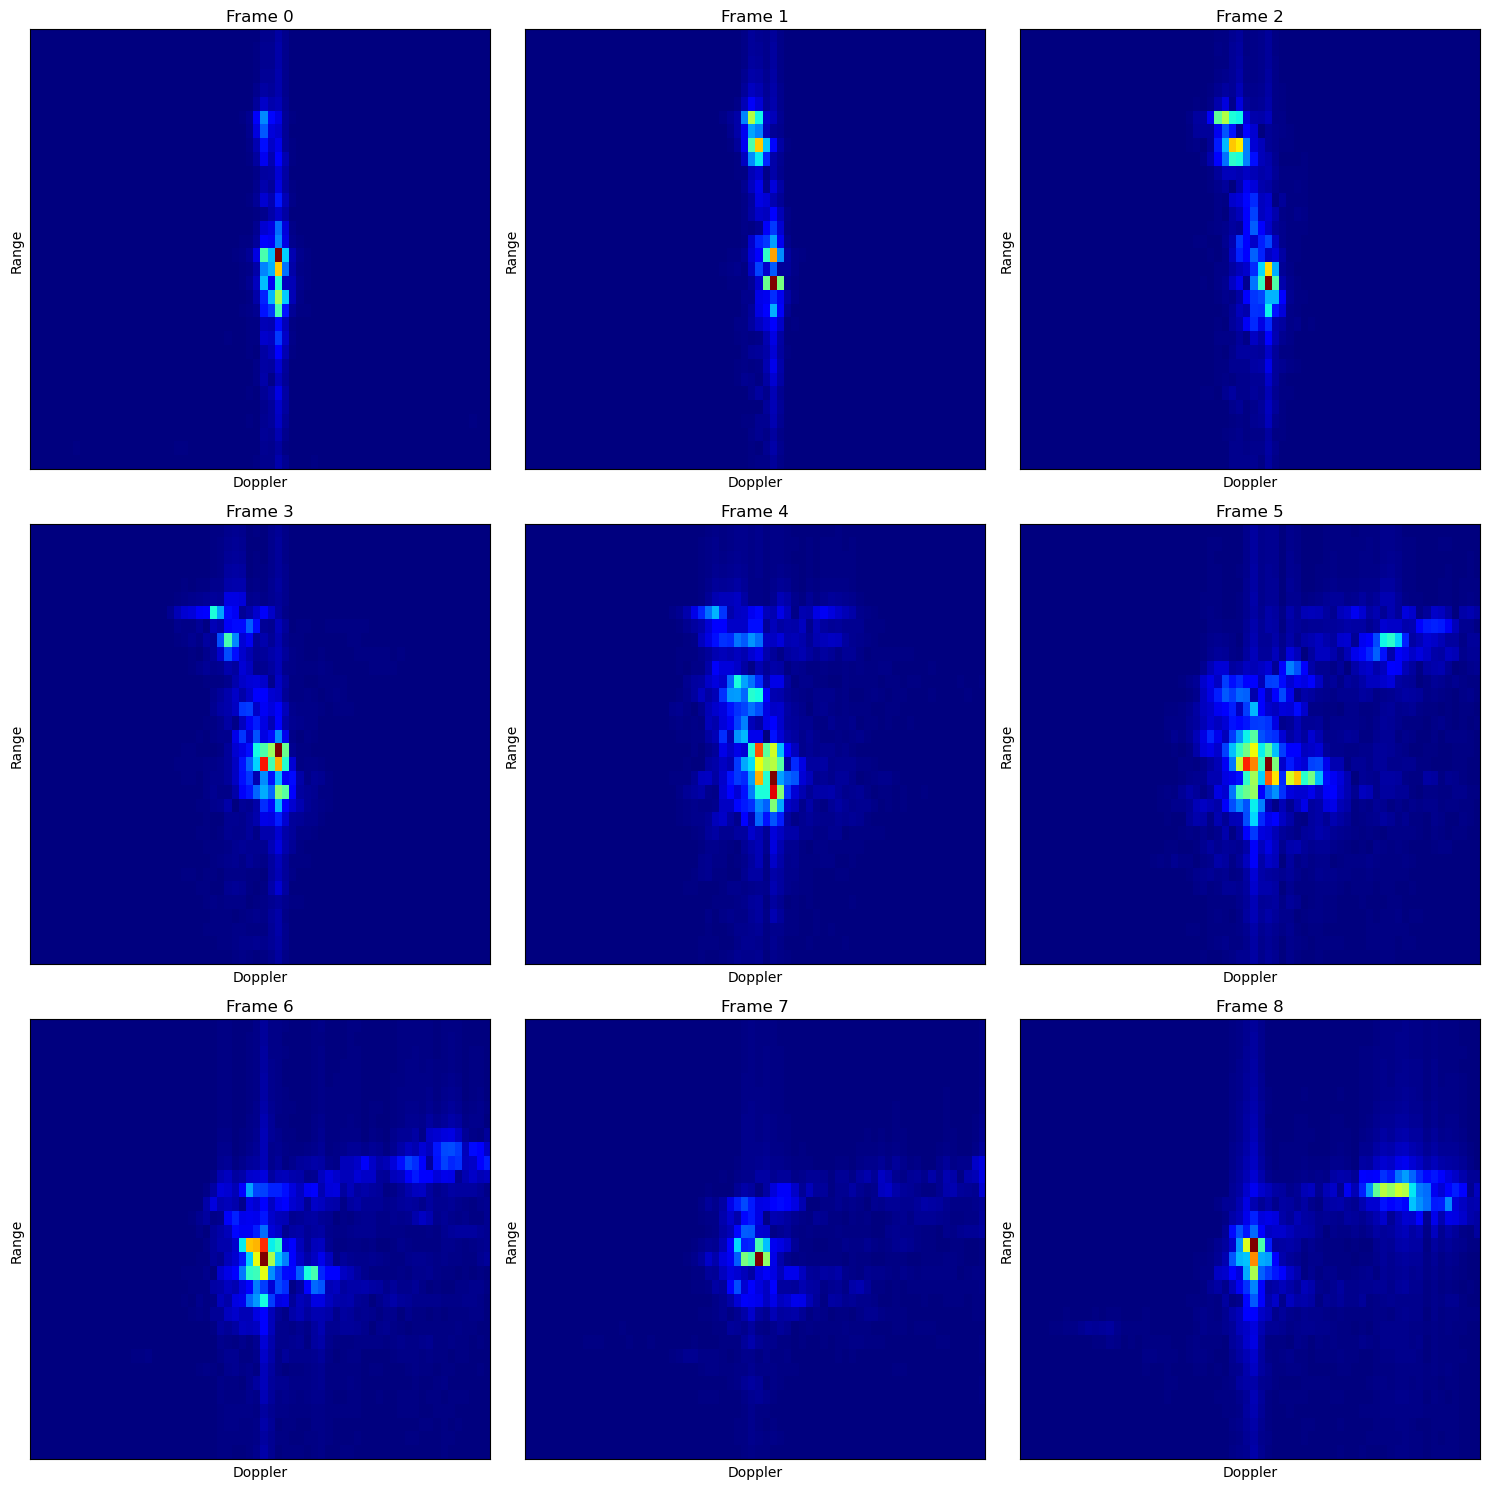

In [16]:
# Plotting the first 9 frames of RDT data
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(rdt_dataframes[0][i, :, :], cmap='jet', aspect='auto')
    ax.set_title(f'Frame {i}')
    ax.set_xlabel('Doppler')
    ax.set_ylabel('Range')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [17]:
np.array(dt_dataframes[0])[].shape

SyntaxError: invalid syntax (4120741153.py, line 1)

In [ ]:
# Number of frames to plot
num_frames = 5

# Plotting the first few frames of DT data
for i in range(num_frames):
    plt.figure(figsize=(10, 4))
    plt.plot(np.array(dt_dataframes[0])[i])
    plt.title(f'DT Signal - Frame {i}')
    plt.xlabel('Time')
    plt.ylabel('Intensity')
    plt.grid(True)
    plt.show()

## Preprocessing

In [11]:
rdt_dataframes[2].shape

(20152, 32, 64)

In [46]:
X_train_processed = []

num_frames_to_add = 149

# Define the shape of each frame
frame_shape = (32, 64)

# Create null frames
null_frames = np.zeros((num_frames_to_add,) + frame_shape)

In [47]:
extended_dataframe = np.concatenate([rdt_dataframes[0], null_frames], axis=0)


In [48]:
extended_dataframe.shape

(24000, 32, 64)

In [49]:
X_train = extended_dataframe

In [50]:
X_train = X_train.reshape((-1, 32, 64, 1000, 1))

In [51]:
a = a + [0] * 149

In [52]:
len(a)

24000

In [53]:
y_train = np.array(a)

In [54]:
y = y_train
X = X_train

In [55]:
y_reshaped = np.array(y).reshape(-1, 1000)
num_classes = 3  # Assuming you have 3 classes
y_one_hot = np.eye(num_classes)[y_reshaped]

# Reshape again to match the expected shape of y for the model
y_final = y_one_hot.reshape(-1, 1000, num_classes)

In [56]:
y_final.shape

(24, 1000, 3)

In [59]:
X.shape

(24, 32, 64, 1000, 1)

In [57]:
import tensorflow as tf
from keras.layers import Input,Dropout,Reshape,Permute,Conv1D,Conv3D, Permute,Flatten,Dense
from keras.models import Model,Sequential

model = Sequential()


def create_model(input_shape):
    # Input layer
    inputs = Input(shape=input_shape)

    # Shape variant layers
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 2, 1), padding='same', activation='relu')(inputs)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(2, 2, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(2, 2, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(2, 2, 1), padding='same', activation='relu')(x)

    # Shape invariant layers
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)
    x = Conv3D(filters=32, kernel_size=(3, 3, 3), strides=(1, 1, 1), padding='same', activation='relu')(x)

    # Flatten layer
    # Flatten layer
    x = Flatten()(x)
    
    # Reshape layer
    x = Reshape((512, 1000))(x)
    # Additional layers
    x = Permute((2, 1))(x)

    x = Conv1D(filters=3, kernel_size=1)(x)

    # Assuming you have a custom SelfAttention layer
    #x = SelfAttention(4,32)(x)

    # Additional layers
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    outputs = Dense(3, activation='softmax')(x)  # Assuming 3 output classes

    # Define model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Input shape
input_shape = (32, 64, 1000, 1)  # Assuming range x doppler x time x channels

# Create the model
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 64, 1000, 1   0         
                             )]                                  
                                                                 
 conv3d_36 (Conv3D)          (None, 32, 32, 1000, 32   896       
                             )                                   
                                                                 
 conv3d_37 (Conv3D)          (None, 16, 16, 1000, 32   27680     
                             )                                   
                                                                 
 conv3d_38 (Conv3D)          (None, 8, 8, 1000, 32)    27680     
                                                                 
 conv3d_39 (Conv3D)          (None, 4, 4, 1000, 32)    27680     
                                                           

In [60]:
history = model.fit(X, y_final, epochs=10, batch_size=32)


Epoch 1/10


1/1 [==============================] - 225s 225s/step - loss: 3.4964 - accuracy: 0.2192
Epoch 2/10
1/1 [==============================] - 154s 154s/step - loss: 1.2089 - accuracy: 0.3285
Epoch 3/10
1/1 [==============================] - 175s 175s/step - loss: 1.1213 - accuracy: 0.3880
Epoch 4/10


KeyboardInterrupt: 

In [61]:
s = 0 
for i in rdt_dataframes : 
    s+= i.shape[0]

In [62]:
s

73647

In [72]:
frame_shape = (32, 64)
s = 0
for i in rdt_dataframes :
    s+=i.shape[0]
num_frames_to_add = 1000 - (s % 1000)

null_frames = np.zeros((num_frames_to_add,) + frame_shape)
    

concatenated_array = np.concatenate(rdt_dataframes, axis=0)
extended_array = np.concatenate([concatenated_array, null_frames], axis=0)

In [73]:
extended_array.shape

(24000, 32, 64)

In [74]:
num_frames_to_add

149

In [75]:
rdt_dataframes[0].shape

(23851, 32, 64)